## 最小二乗法を用いた線形回帰デモ

In [1]:
# 各種ライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

%matplotlib inline

### q軸インダクタンスとd,q軸電流の組み合わせデータを読み込み

In [2]:
df_Lq = pd.read_csv('Lq_sample.csv')
df_Lq

,id [A],iq [A],Lq [mH]
0,-11,1,13.349506
1,-3,2,13.815233
2,-4,3,13.479459
3,-17,4,11.797280
4,-2,5,13.223080
5,-19,6,11.233586
6,-16,7,11.365361
7,-18,8,10.994353
8,-14,9,11.220473
9,-5,10,11.613858


### とりあえず3次元上で可視化

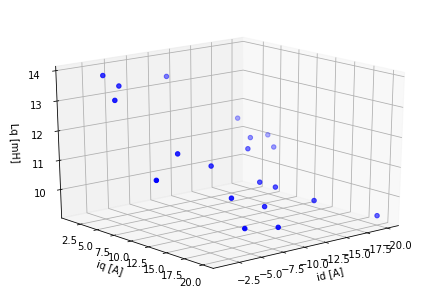

In [3]:
# x,y,zの定義
x = df_Lq['id [A]']
y = df_Lq['iq [A]']
z = df_Lq['Lq [mH]']

# 図の初期化
fig = plt.figure()
ax = Axes3D(fig)

# 軸ラベルの指定
ax.set_xlabel("id [A]")
ax.set_ylabel("iq [A]")
ax.set_zlabel("Lq [mH]")

# 散布図の設定
ax.scatter(x, y, z, color='b')

# 3次元マップの角度を指定
ax.view_init(elev=20, azim=50)

### 見る角度を変えてみる

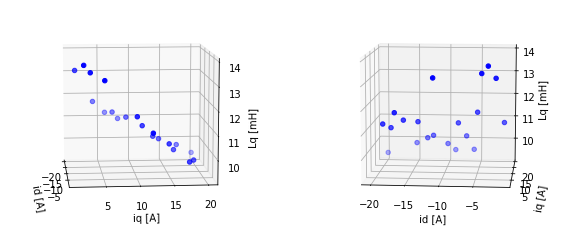

In [4]:
# 図の初期化
fig = plt.figure(figsize=plt.figaspect(0.4))

### 1つ目のグラフの設定
ax = fig.add_subplot(1, 2, 1, projection='3d')

# 軸ラベルの指定
ax.set_xlabel("id [A]")
ax.set_ylabel("iq [A]")
ax.set_zlabel("Lq [mH]")

# 散布図の設定
ax.scatter(x, y, z, color='b')

# 3次元マップの角度を指定
ax.view_init(elev=10, azim=-5)

### 2つ目のグラフの設定
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# 軸ラベルの指定
ax2.set_xlabel("id [A]")
ax2.set_ylabel("iq [A]")
ax2.set_zlabel("Lq [mH]")

# 散布図の設定
ax2.scatter(x, y, z, color='b')

# 3次元マップの角度を指定
ax2.view_init(elev=10, azim=-85)

Lqはiqに強い相関がありそう

## Lqとiqで最小二乗法による線形単回帰分析をしてみる

求める回帰式はこんな直線の式  

$$
    L_q = w_0+w_1 i_q
$$
  
  
  sklearnのLinearRegressionというライブラリを使っています  
  もちろん回帰係数を行列の演算により求めることもできます

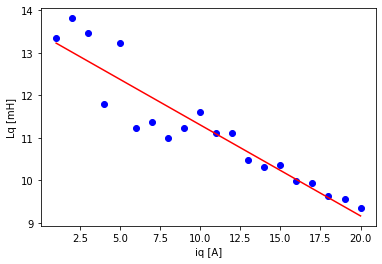

 決定係数r2: 0.869


In [5]:
Lq = df_Lq['Lq [mH]']
iq = df_Lq['iq [A]']
iq = np.array(iq).reshape(-1,1)

# ライブラリsklearnを用いて通常最小二乗法の解を算出
OLS = LinearRegression().fit(iq, Lq)

# Lqの推定値を計算
Lq_predicted = OLS.predict(iq)

# 図示
plt.plot(iq, Lq, 'o', c='b')
plt.plot(iq, Lq_predicted, c='r')
plt.xlabel("iq [A]")
plt.ylabel("Lq [mH]")
plt.show()

# スコア(決定係数)を計算
print(" 決定係数r2: {:.3f}".format( OLS.score(iq, Lq) ))

## 今度はidも追加して線形重回帰分析をしてみる

求める回帰式はこんな平面の式  

$$
    L_q = w_0+w_1 i_d+w_2 i_q
$$
  

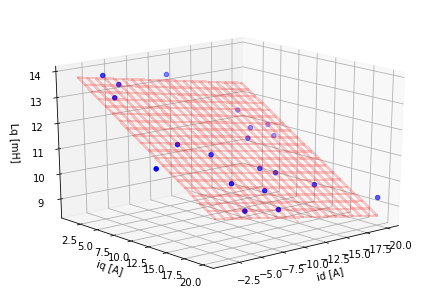

 決定係数r2: 0.952


In [6]:
Lq = df_Lq['Lq [mH]']
currents = df_Lq.iloc[:, :2]

# ライブラリsklearnを用いて通常最小二乗法の解を算出
OLS = LinearRegression().fit(currents, Lq)

# 生データ図示
x = df_Lq['id [A]']
y = df_Lq['iq [A]']

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("id [A]")
ax.set_ylabel("iq [A]")
ax.set_zlabel("Lq [mH]")

ax.scatter(x, y, Lq, color='b')

# 推定データ計算と図示
X, Y = np.meshgrid(x, y)
currents_mesh = np.vstack([X.flatten(), Y.flatten()]).T
Lq_predicted = OLS.predict(currents_mesh).reshape(20,20)

ax.plot_wireframe(X, Y, Lq_predicted, color='r', antialiased=False, alpha=0.2)

ax.view_init(elev=20, azim=50)

plt.show()

# スコア(決定係数)を計算
print(" 決定係数r2: {:.3f}".format( OLS.score(currents, Lq) ))

決定係数が向上

## 2次の多項式回帰にしてみる

目指す回帰式はこんな2次多項式  

$$
    L_q = w_0+w_1 i_d+w_2 i_q+w_3 i_d^2+w_4 i_q^2+w_5 i_d i_q
$$
  
  
  sklearnのPolynominalFeaturesというライブラリを使えば簡単に入力変数変換ができるのですが  
今回分かりやすさ重視でライブラリ無しで書いています

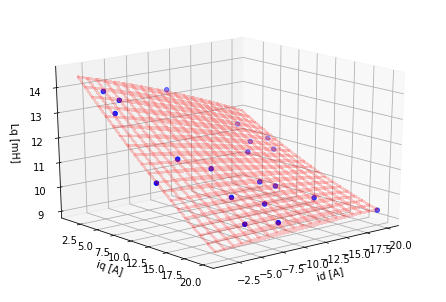

 決定係数r2: 0.997


In [7]:
Lq = df_Lq['Lq [mH]']

# 入力変数の変換
id_ = df_Lq['id [A]']
id2 = id_ ** 2
iq = df_Lq['iq [A]']
iq2 = iq ** 2
idiq = id_ * iq

# 入力変数の結合
currents = np.vstack([id_, iq])
currents = np.vstack([currents, id2])
currents = np.vstack([currents, iq2])
currents = np.vstack([currents, idiq]).T

# 学習
OLS = LinearRegression().fit(currents, Lq)

# 生データ図示
x = id_
y = iq

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("id [A]")
ax.set_ylabel("iq [A]")
ax.set_zlabel("Lq [mH]")

ax.scatter(x, y, Lq, color='b')

# 推定データ計算と図示
X, Y = np.meshgrid(x, y)
X_ = X.flatten()
Y_ = Y.flatten()

currents_mesh = np.vstack([X_, Y_])
currents_mesh = np.vstack([currents_mesh, X_**2])
currents_mesh = np.vstack([currents_mesh, Y_**2])
currents_mesh = np.vstack([currents_mesh, X_*Y_]).T

Lq_predicted = OLS.predict(currents_mesh).reshape(20,20)

ax.plot_wireframe(X, Y, Lq_predicted, color='r', antialiased=False, alpha=0.2)

ax.view_init(elev=20, azim=50)

plt.show()

# スコア(決定係数)を計算
print(" 決定係数r2: {:.3f}".format( OLS.score(currents, Lq) ))

決定係数が1に近く，より正確な回帰式(曲面)を導出